In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [2]:
# set parameter
nx = 41
L = 2.0
dx = L/(nx-1)

nu = 0.3

sigma = 0.6
dt=sigma*dx**2 / nu
nt=20

In [3]:
x= numpy.linspace(0.0 , L ,num=nx)

In [4]:
u0 = numpy.ones(nx)
mask = numpy.where((x>=0.5)&(x<=1))
u0[mask]=2

In [5]:
u=u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1,nx-1):
        u[i]=un[i]+sigma*(un[i-1]-2*un[i]+un[i+1])
    u[0]=1
    u[-1]=1

u_naive =u

In [6]:
u=u0.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1]=un[1:-1]+sigma*(un[:-2]-2*un[1:-1]+un[2:])

In [7]:
numpy.allclose(u_naive,u)

True

In [8]:
def diffusion(u0,sigma=0.5,nt=20):
    u_hist=[u0.copy()]
    u=u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1]=un[1:-1]+sigma*(un[:-2]-2*un[1:-1]+un[2:])
        u_hist.append(u.copy())
    return u_hist

In [9]:
u_hist=diffusion(u0,sigma=sigma, nt=nt)

In [10]:
def plot_solution(n,u_hist,x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x,u_hist[0],label='initial')
    pyplot.plot(x,u_hist[n],label='current')
    pyplot.legend()
    pyplot.xlim(0.0,2.0)
    pyplot.ylim(0.5,2.5)
    pyplot.show()

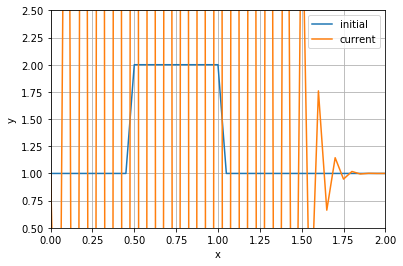

In [11]:
plot_solution(-1,u_hist, x)

In [12]:
import ipywidgets

In [13]:
nt_slider =ipywidgets.IntSlider(value=0, min=0,max=nt,step=1,
                              description='Time steo')
w= ipywidgets.interactive(plot_solution, n=nt_slider , u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

In [14]:
display(w)

interactive(children=(IntSlider(value=0, description='Time steo', max=20), Output()), _dom_classes=('widget-in…

In [15]:
def diffusion(u0,sigma=0.6,nt=20):
    u_hist=[u0.copy()]
    u=u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1]=un[1:-1]+sigma*(un[:-2]-2*un[1:-1]+un[2:])
        u_hist.append(u.copy())
    return u_hist
u_hist=diffusion(u0,sigma=sigma, nt=nt)
nx = 41
L = 2.0
dx = L/(nx-1)

nu = 0.3

sigma = 0.6
dt=sigma*dx**2 / nu
nt=20

In [16]:
nt_slider =ipywidgets.IntSlider(value=0, min=0,max=nt,step=1,
                              description='Time steo')
w= ipywidgets.interactive(plot_solution, n=nt_slider , u_hist=ipywidgets.fixed(u_hist), x=ipywidgets.fixed(x))

In [17]:
display(w)

interactive(children=(IntSlider(value=0, description='Time steo', max=20), Output()), _dom_classes=('widget-in…